In [ ]:
import os
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
import scipy.io
#from scipy.interpolate import griddata
#from plotting import newfig, savefig

np.random.seed(1234)
#tf.random.set_random_seed(1234)
#%%
def fun_x(x):
    
    f = np.zeros(len(x))
    f = np.reshape(f, (-1, 1))
    #f = []
    for i in range(len(x)):
        
        if x[i]<=0:
                  
            f[i] = 0.2*np.sin(6*x[i]) 
            
        else:
            
            f[i] = 0.1*x[i]*np.cos(18*x[i]) + 1
            
    return f


def hyper_parameters_A(size):

    a = tf.Variable(tf.constant(0.1, shape=size))

    return a

def hyper_parameters(size):

    return tf.Variable(tf.random.normal(shape=size, mean = 0., stddev = 0.1))

def DNN(X, W, b, a):
    A = X
    L = len(W)
    for i in range(L - 1):
        A = tf.tanh(10*a[i]*
                    tf.add(tf.matmul(A, W[i]), b[i])) 
    Y = tf.add(tf.matmul(A, W[-1]), b[-1])
    return Y

if __name__ == "__main__":
   
    
    N = 300
    x = np.linspace(-3,3, N+1)
    x = np.reshape(x, (-1, 1))
    y = fun_x(x)

    layers = [1] + 4*[50] + [1]
    W = [hyper_parameters([layers[l-1], layers[l]]) for l in range(1, len(layers))]
    b = [hyper_parameters([1, layers[l]]) for l in range(1, len(layers))]
    a = [hyper_parameters_A([1, layers[l]]) for l in range(1, len(layers))]
      
    print('\n', len(a), a, a[0], sep = '\n')
    
    x_train = tf.placeholder(tf.float32, shape=[None, 1])
    y_train = tf.placeholder(tf.float32, shape=[None, 1])
    y_pred = DNN(x_train, W, b, a)

    min_er = 0
    for iter in a:
      min_er += tf.exp(tf.reduce_mean(iter))
    min_er = 1 / min_er

    loss = tf.reduce_mean(tf.square(y_pred - y_train)) + min_er
    '''    
(1.0/(tf.reduce_mean( tf.exp(tf.reduce_mean(a[0])) + tf.exp(tf.reduce_mean(a[1]))+ tf.exp(tf.reduce_mean(a[2]))+ \
                     tf.exp(tf.reduce_mean(a[3]))     
                     )))
    '''    
                    
    train = tf.train.AdamOptimizer(2.0e-4).minimize(loss)
 

    sess = tf.Session()

    sess.run(tf.global_variables_initializer())

    nmax = 15001
    n = 0

    MSE_hist = []
    Sol = []
    a_hist = []

    
     
  



5
[<tf.Variable 'Variable_265:0' shape=(1, 50) dtype=float32_ref>, <tf.Variable 'Variable_266:0' shape=(1, 50) dtype=float32_ref>, <tf.Variable 'Variable_267:0' shape=(1, 50) dtype=float32_ref>, <tf.Variable 'Variable_268:0' shape=(1, 50) dtype=float32_ref>, <tf.Variable 'Variable_269:0' shape=(1, 1) dtype=float32_ref>]
<tf.Variable 'Variable_265:0' shape=(1, 50) dtype=float32_ref>


In [ ]:
while n <= nmax: #and err > 1.0e-6:
        n = n + 1
        loss_, _, y_ = sess.run([loss, train, y_pred], feed_dict={x_train: x, y_train: y})
        err = loss_
        a_value  = sess.run(a, feed_dict={x_train: x, y_train: y})
        a_value = np.concatenate(a_value, axis=1)
        a_value = np.reshape(a_value, (1, -1))  
        a_hist.append(a_value)
        
        MSE_hist.append(err)
        
        if n == 200 or n==800 or n==8000: 
   
            Sol.append(y_)
            print('Steps: %d, loss: %.3e'%(n, loss_))  

Solution = np.concatenate(Sol, axis=1)
    ###############################################################
A_value = np.concatenate(a_hist, axis=0)

    ##################### DATA storing (.mat file) #######################
with open('History_NN.mat','wb') as f:
  scipy.io.savemat(f, {'MSE_hist': MSE_hist})

Steps: 200, loss: 2.598e-01
Steps: 800, loss: 1.892e-01
Steps: 8000, loss: 8.151e-02


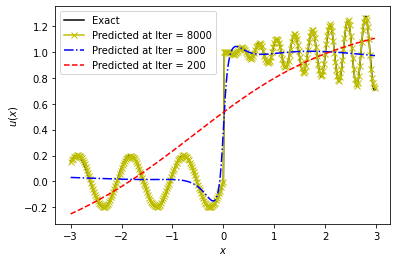

In [56]:
  ###################### Plotting
ax = plt.plot(1.0, 1.1)
plt.plot(x[0:-1], y[0:-1], 'k-',  label = 'Exact')
plt.plot(x[0:-1], Solution[0:-1,-1], 'yx-',  label = 'Predicted at Iter = 8000')
plt.plot(x[0:-1], Solution[0:-1,1], 'b-.',  label = 'Predicted at Iter = 800')
plt.plot(x[0:-1], Solution[0:-1,0], 'r--',  label = 'Predicted at Iter = 200')
plt.xlabel('$x$')
plt.ylabel('$u(x)$')
plt.legend(loc='upper left')
plt.show()